In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_palette("colorblind")
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.linear_model import LinearRegression

In [ ]:
cbg_unpack = pd.read_csv('cbg_unpack.csv', dtype = {'visitor_home_cbgs': str})
cbg_income = pd.read_csv('cbg_income.csv', index_col = 'cbg', dtype = {'cbg': str}).dropna()
cbg_stats = pd.read_csv('cbg_stats.csv', index_col = 'cbg', dtype = {'cbg': str})

# selecting cbg and brand

In [5]:
# get the matrix of cbg * brand
cbg_brand = cbg_unpack.drop('placekey', axis = 1) # drop placekey as it is not useful here
cbg_brand = cbg_brand.groupby(['visitor_home_cbgs', 'brands']).sum()
cbg_brand = cbg_brand.unstack()
cbg_brand = cbg_brand.fillna(0) # replace NaN as 0
cbg_brand.columns = cbg_brand.columns.droplevel(0)
cbg_brand.index.name = 'cbg'
## get cbgs that have income data available
cbg_brand = cbg_brand[cbg_brand.index.isin(cbg_income.index)]

In [6]:
cbg_brand

brands,& Other Stories,&pizza,1-800-Flowers,10 Spot/MadRag,110 Grill,16 Handles,24 Hour Fitness,2nd Wind Exercise Equipment,5 Napkin Burger,5 Star Nutrition,...,iFresh Market,iLoveKickboxing,iPic Entertainment,itsu,junzi,lululemon athletica,maurices,rue21,sweetgreen,vineyard vines
cbg,,,,,,,,,,,,,,,,,,,,,
010010201002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010010205001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010010206001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010010208024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010030103003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721390602123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721390603022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721455602011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# cbg_brand.to_csv('cbg_brand.csv')

In [8]:
rowsum = cbg_brand.sum(axis=1)
colsum = cbg_brand.sum(axis=0)
selected_cbg_brand = cbg_brand.loc[rowsum >= 100, colsum >= 100]

In [9]:
selected_cbg_brand

brands,& Other Stories,&pizza,1-800-Flowers,10 Spot/MadRag,110 Grill,16 Handles,24 Hour Fitness,2nd Wind Exercise Equipment,5 Napkin Burger,5.11 Tactical,...,iFly Indoor Skydiving,iFresh Market,iLoveKickboxing,itsu,junzi,lululemon athletica,maurices,rue21,sweetgreen,vineyard vines
cbg,,,,,,,,,,,,,,,,,,,,,
060377019021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
090010101011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
090010101012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
090010101013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
090010101014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421179504001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421179505003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421179506002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
sum(selected_cbg_brand.isna().sum())

0

In [11]:
selected_cbg_income = cbg_income.loc[selected_cbg_brand.index.values]
selected_brands = pd.DataFrame({'brands': selected_cbg_brand.columns.values})

In [12]:
# selected_cbg_brand.to_csv("selected_cbg_brand.csv")
# selected_cbg_income.to_csv('selected_cbg_income.csv')
# selected_brands.to_csv('selected_brands.csv', index = False)

# robustness check of selected vs other cbgs

In [13]:
sampled_cbg = list(set(cbg_brand.index.values) & set(cbg_stats.index.values))
sample_cbg_stats = cbg_stats.loc[sampled_cbg]
sample_cbg_stats['select_cbg'] = np.where(sample_cbg_stats.index.isin(selected_cbg_brand.index.values), 1, 0)
select_cbg_stats = sample_cbg_stats[sample_cbg_stats['select_cbg'] == 1]
other_cbg_stats = sample_cbg_stats[sample_cbg_stats['select_cbg'] == 0]

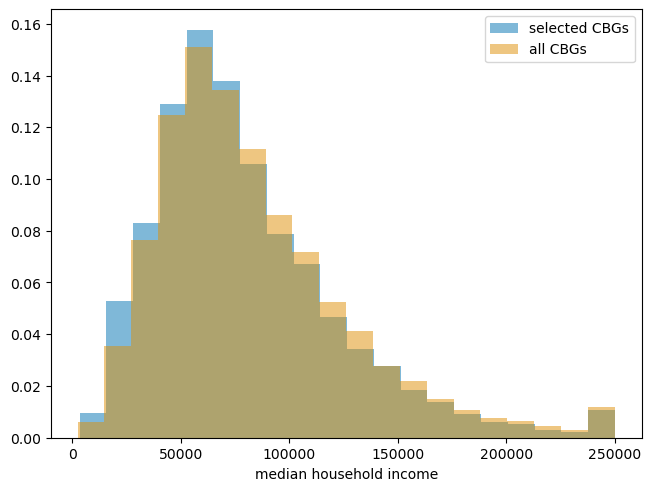

In [14]:
plt.figure(constrained_layout=True)
plt.hist(select_cbg_stats['income'], alpha=0.5, label='selected CBGs', bins= 20, weights = np.ones(len(select_cbg_stats)) / len(select_cbg_stats))
plt.hist(sample_cbg_stats['income'], alpha=0.5, label='all CBGs', bins=20, weights = np.ones(len(sample_cbg_stats)) / len(sample_cbg_stats))
plt.xlabel('median household income')
plt.legend()
plt.show()
# plt.savefig('Appendix/FigureA1.png', dpi = 300)

In [15]:
NY_cbg = cbg_brand.index[cbg_brand.index.astype(str).str.startswith('36')].values
print("number of cbg in NY: ", len(NY_cbg))
print('number of NY cbg in selected: ', sum(select_cbg_stats.index.isin(NY_cbg)))
print('number of NY cbg in other: ', sum(other_cbg_stats.index.isin(NY_cbg)))

number of cbg in NY:  14363
number of NY cbg in selected:  13376
number of NY cbg in other:  987


# prediction analyses

## lasso regression

In [16]:
X = selected_cbg_brand.div(selected_cbg_brand.sum(axis=1), axis=0)
y = selected_cbg_income['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [17]:
lasso = LassoCV().fit(X_train, y_train)
pred = lasso.predict(X_test)
predtr = lasso.predict(X_train)

In [18]:
print("correlation between predicted vs actual in test set", stats.pearsonr(pred, y_test))
print("correlation between predicted vs actual in training set", stats.pearsonr(predtr, y_train))

correlation between predicted vs actual in test set PearsonRResult(statistic=0.7476561224522646, pvalue=0.0)
correlation between predicted vs actual in training set PearsonRResult(statistic=0.7684532788055607, pvalue=0.0)


In [19]:
lasso.score(X_train, y_train)

0.5898344661467876

In [20]:
lasso.alpha_

0.7326613482658627

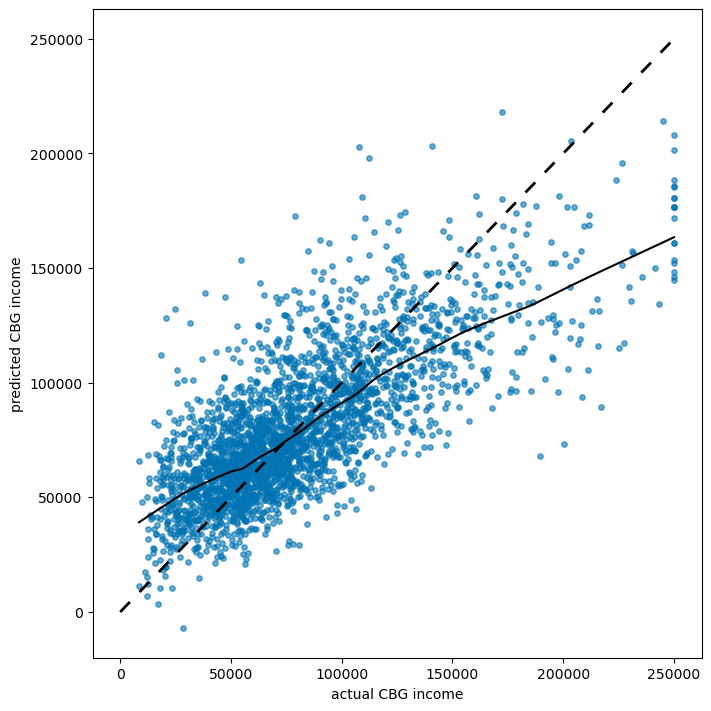

In [21]:
plt.figure(figsize=(7, 7), constrained_layout=True)

plt.xlabel("actual CBG income")
plt.ylabel("predicted CBG income")

x = y_test
y = pred
plt.scatter(x, y, s = 15, alpha = 0.6)

lowess_x, lowess_y = lowess(y, x, 0.2).T

plt.plot(list(range(250000)), list(range(250000)), "--",color = "black", linewidth = 2, dashes=(5, 5))
plt.plot(lowess_x, lowess_y, color = "black")

plt.show()
# plt.savefig('Appendix/FigureB1.png', dpi = 300)

In [22]:
sum(lasso.coef_ != 0)

355

In [23]:
df = pd.DataFrame({"brands": selected_cbg_brand.columns.values, "coef": lasso.coef_})
df = df[df["coef"] != 0]

In [24]:
list(df.sort_values('coef').head(10)['brands'])

['iFresh Market',
 'Net Cost Market',
 'Kmart',
 'Showcase Cinemas',
 "Jet's Pizza",
 'Jimmy Jazz',
 "Jimmy John's",
 'Vivi Bubble Tea',
 'Krispy Kreme Doughnuts',
 'YWCA']

In [25]:
df.sort_values('coef').tail(10)

,brands,coef
393,Hermès,4.741234e+05
96,Benihana,4.795172e+05
594,PGA TOUR Superstore,4.930144e+05
108,Bloomingdale's,5.267737e+05
832,Tropical Smoothie Café,5.518511e+05
886,Whole Foods Market,6.182782e+05
493,Lord and Taylor,6.795133e+05
494,Loro Piana,8.899401e+05
488,Lifetime Fitness,1.050059e+06
47,Anthony's Coal Fired Pizza,1.051556e+06


## OLS regression

In [26]:
lm = LinearRegression().fit(X_train, y_train)
pred = lm.predict(X_test)
predtr = lm.predict(X_train)

In [27]:
print("correlation between predicted vs actual in test set", stats.pearsonr(pred, y_test))
print("correlation between predicted vs actual in training set", stats.pearsonr(predtr, y_train))

correlation between predicted vs actual in test set PearsonRResult(statistic=0.7304852595362632, pvalue=0.0)
correlation between predicted vs actual in training set PearsonRResult(statistic=0.790830051035129, pvalue=0.0)


In [28]:
lm.score(X_train, y_train)

0.6254083701736675

## lasso for education

In [29]:
selected_cbg_stats = cbg_stats.loc[selected_cbg_brand.index.values]

In [30]:
selected_cbg_stats.isna().sum()

income                  0
income_moe            124
bachelor_or_higher      0
years_edu_weighted      0
median_age              0
male_proportion         0
white_proportion        0
dtype: int64

In [31]:
X = selected_cbg_brand.div(selected_cbg_brand.sum(axis=1), axis=0)
y = selected_cbg_stats['bachelor_or_higher']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [32]:
lasso = LassoCV().fit(X_train, y_train)
pred = lasso.predict(X_test)
predtr = lasso.predict(X_train)

In [33]:
print("correlation between predicted vs actual in test set", stats.pearsonr(pred, y_test))
print("correlation between predicted vs actual in training set", stats.pearsonr(predtr, y_train))

correlation between predicted vs actual in test set PearsonRResult(statistic=0.7919299474593438, pvalue=0.0)
correlation between predicted vs actual in training set PearsonRResult(statistic=0.8093302991783026, pvalue=0.0)


In [34]:
lasso.score(X_train, y_train)

0.6545385246720461

In [35]:
lasso.alpha_

3.0018736927796115e-06

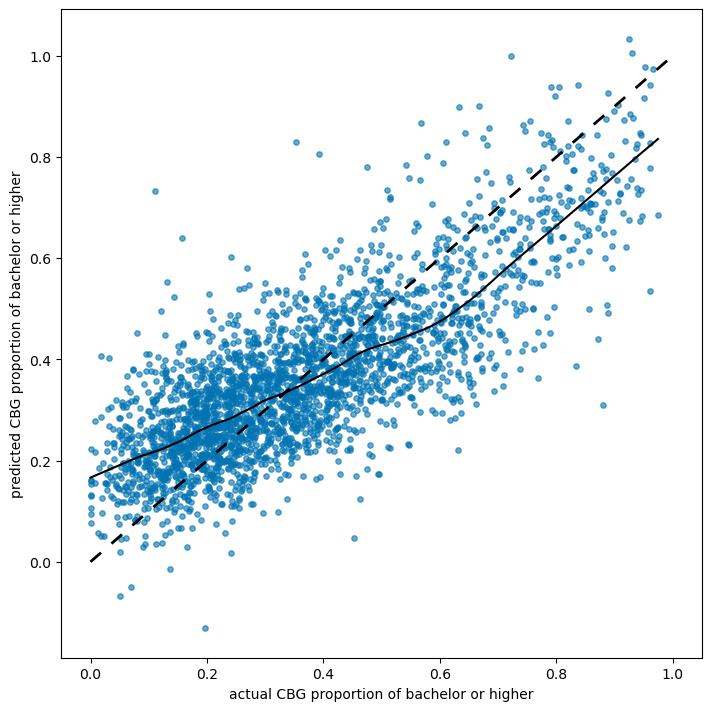

In [36]:
plt.figure(figsize=(7, 7), constrained_layout=True)

plt.xlabel("actual CBG proportion of bachelor or higher")
plt.ylabel("predicted CBG proportion of bachelor or higher")

x = y_test
y = pred
plt.scatter(x, y, s = 15, alpha = 0.6)

lowess_x, lowess_y = lowess(y, x, 0.2).T

plt.plot(list(np.linspace(0, 1, 1000)), list(np.linspace(0, 1, 1000)), "--",color = "black", linewidth = 2, dashes=(5, 5))
plt.plot(lowess_x, lowess_y, color = "black")

plt.show() 
#plt.savefig('Appendix/FigureD1.png', dpi = 300)

In [37]:
sum(lasso.coef_ != 0)

402